In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set_theme(style="whitegrid")

In [ ]:
# Load the dataset into the required variable
data_set_path = "Tree_Inventory_chngd.csv"
data_set = pd.read_csv(data_set_path)

# Displaying the top rows of the data set
data_set.head()


<ipython-input-2-f1db3af320bc>:3: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set = pd.read_csv(data_set_path)


,Editing,Botanical Name,Common Name,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),...,Street,Side,Site,Council District,Park Name,Latitude,Longitude,Site ID,Location,location
0,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Voorhees Av,Front,1,University,0,42.949165,-78.841321,67677,"(42.94916505816885, -78.8413205755309)",POINT (-78.8413205755309 42.94916505816885)
1,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Suffolk St,Side,1,University,0,42.929809,-78.810253,124602,"(42.9298088030838, -78.81025280122812)",POINT (-78.81025280122812 42.9298088030838)
2,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Bailey Av,Front,2,University,0,42.934032,-78.813544,78816,"(42.9340316529, -78.8135438398)",POINT (-78.8135438398 42.9340316529)
3,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Nicholson St,Front,1,University,0,42.956956,-78.835782,132981,"(42.95695595532133, -78.8357816001408)",POINT (-78.8357816001408 42.95695595532133)
4,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Highgate Av,Front,1,University,0,42.948224,-78.817837,71694,"(42.9482240157, -78.8178368591)",POINT (-78.8178368591 42.9482240157)


In [ ]:
#printing the statistics of the data set
stats_of_dataset = data_set.describe()
print(stats_of_dataset)

#printing the important column charactersistics such as Center, spread, shape
print("Mean value:", data_set['DBH'].mean())
print("Median value:", data_set['DBH'].median())

print("Range of values:", data_set['DBH'].max() - data_set['DBH'].min())

print("Variance of DBH:", data_set['DBH'].var())
print("Standard Deviation of DBH:", data_set['DBH'].std())


                 DBH  Total Yearly Eco Benefits ($)  Stormwater Benefits ($)  \
count  133228.000000                  133228.000000            133228.000000   
mean        7.323541                      58.417271                 3.946975   
std        10.134186                      76.909277                 7.485670   
min       -10.000000                       0.000000                 0.000000   
25%         0.000000                       0.000000                 0.000000   
50%         2.000000                      15.350000                 0.240000   
75%        13.000000                     103.250000                 4.710000   
max       508.000000                     469.300000                68.280000   

       Stormwater Gallons Saved  Greenhouse CO2 Benefits ($)  \
count             133228.000000                133228.000000   
mean                 493.370111                     0.306712   
std                  935.692146                     0.646869   
min                    

In [ ]:
# get the basic information about the data set using following command
data_set.info()

# Check if there is any missing columns and give the total number of missing values in that column
data_set.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133229 entries, 0 to 133228
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Editing                         133229 non-null  object 
 1   Botanical Name                  133229 non-null  object 
 2   Common Name                     133229 non-null  object 
 3   DBH                             133228 non-null  float64
 4   Total Yearly Eco Benefits ($)   133228 non-null  float64
 5   Stormwater Benefits ($)         133228 non-null  float64
 6   Stormwater Gallons Saved        133228 non-null  float64
 7   Greenhouse CO2 Benefits ($)     133228 non-null  float64
 8   CO2 Avoided (in lbs.)           133228 non-null  float64
 9   CO2 Sequestered (in lbs.)       133228 non-null  float64
 10  Energy Benefits ($)             133228 non-null  float64
 11  kWh Saved                       133228 non-null  float64
 12  Therms Saved    

,0
Editing,0
Botanical Name,0
Common Name,0
DBH,1
Total Yearly Eco Benefits ($),1
Stormwater Benefits ($),1
Stormwater Gallons Saved,1
Greenhouse CO2 Benefits ($),1
CO2 Avoided (in lbs.),1
CO2 Sequestered (in lbs.),1


In [ ]:
#Cleaning-1
# We will drop the row which has null value in the any column
data_set_cleaned = data_set.dropna()

# We will verify again that there are no empty columns left after previous step
print(data_set_cleaned.isnull().sum())


Editing                           0
Botanical Name                    0
Common Name                       0
DBH                               0
Total Yearly Eco Benefits ($)     0
Stormwater Benefits ($)           0
Stormwater Gallons Saved          0
Greenhouse CO2 Benefits ($)       0
CO2 Avoided (in lbs.)             0
CO2 Sequestered (in lbs.)         0
Energy Benefits ($)               0
kWh Saved                         0
Therms Saved                      0
Air Quality Benefits ($)          0
Pollutants Saved (in lbs.)        0
Property Benefits ($)             0
Leaf Surface Area (in sq. ft.)    0
Address                           0
Street                            0
Side                              0
Site                              0
Council District                  0
Park Name                         0
Latitude                          0
Longitude                         0
Site ID                           0
Location                          0
location                    

In [ ]:
#Cleaning-2
#identify number of redundant values present in the data set
print("Redundant values before removing :",data_set_cleaned.duplicated().sum())
data_set_cleaned_2 = data_set_cleaned.drop_duplicates()

# We will verify again that there are no redundant values left after previous step
print("Redundant values after removing :",data_set_cleaned_2.duplicated().sum())


Redundant values before removing : 25
Redundant values after removing : 0


In [ ]:
#Cleaning-3
# print the distinct values for non-numerical columns
for c in data_set_cleaned_2.select_dtypes(include='object').columns:
    print(f"distinct values before handling for {c}:")
    print(data_set_cleaned_2[c].unique())

#Now we have same "Buffalo" as a heading given in 2 types in dataset
# We can convert all the types into proper title format
data_set_cleaned_2['Editing'] = data_set_cleaned_2['Editing'].str.title()


distinct values before handling for Editing:
['Buffalo' 'Olmsted' 'BUFFALO']
distinct values before handling for Botanical Name:
['VACANT' 'STUMP' '0' 'GYMNOCLADUS DIOICUS' 'unsuitable vacant'
 'ACER SACCHARINUM' 'ACER CAMPESTRE' 'FRAXINUS AMERICANA' 'TILIA CORDATA'
 "AMELANCHIER X GRANDIFLORA 'ROBIN HILL'" "ACER PLATANOIDES 'SCHWEDLERI'"
 "PLATANUS X ACERIFOLIA 'BLOODGOOD'" "MALUS 'HARVEST GOLD'"
 'PICEA PUNGENS' 'ACER PLATANOIDES' 'PYRUS CALLERYANA' 'PRUNUS SPP'
 'MALUS SPP' 'ACER RUBRUM' 'CRATAEGUS SPP' 'ACER PSEUDOPLATANUS'
 "GLEDITSIA TRIACANTHOS INERMIS 'SHADEMASTER'"
 "ACER PLATANOIDES 'CRIMSON KING'" 'CRATAEGUS PHAENOPYRUM'
 "PRUNUS SUBHIRTELLA 'AUTUMNALIS'" 'ULMUS SPP' 'TILIA X EUCHLORA'
 'PLATANUS X ACERIFOLIA' 'NYSSA SYLVATICA'
 "PLATANUS X ACERIFOLIA 'EXCLAMATION'"
 "ULMUS CARPINIFOLIA 'CHRISTINE BUISMAN'" 'CORNUS KOUSA' 'QUERCUS BICOLOR'
 'AESCULUS HIPPOCASTANUM' "GINKGO BILOBA 'AUTUMN GOLD'" 'ACER NEGUNDO'
 'ZELKOVA SERRATA' 'PICEA ABIES' 'SYRINGA RETICULATA'
 "BETULA NIG

<ipython-input-9-62f07c246427>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set_cleaned_2['Editing'] = data_set_cleaned_2['Editing'].str.title()


In [ ]:

# Now check the unique values after performing the previous step
print("Unique values after cleaning:",data_set_cleaned_2['Editing'].unique())

Unique values after cleaning: ['Buffalo' 'Olmsted']


In [ ]:
#Cleaning-4
#We have different data types in column 22 as mentioned in dtype warning which can be seen above at block 2 execution
#To handle this we can replace 0 with "Not a park" in the respective column
data_set_cleaned_2['Park Name'].replace(0, 'Not a park')

print(data_set_cleaned_2['Park Name'].dtypes)
data_set.head()




object


,Editing,Botanical Name,Common Name,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),...,Street,Side,Site,Council District,Park Name,Latitude,Longitude,Site ID,Location,location
0,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Voorhees Av,Front,1,University,0,42.949165,-78.841321,67677,"(42.94916505816885, -78.8413205755309)",POINT (-78.8413205755309 42.94916505816885)
1,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Suffolk St,Side,1,University,0,42.929809,-78.810253,124602,"(42.9298088030838, -78.81025280122812)",POINT (-78.81025280122812 42.9298088030838)
2,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Bailey Av,Front,2,University,0,42.934032,-78.813544,78816,"(42.9340316529, -78.8135438398)",POINT (-78.8135438398 42.9340316529)
3,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Nicholson St,Front,1,University,0,42.956956,-78.835782,132981,"(42.95695595532133, -78.8357816001408)",POINT (-78.8357816001408 42.95695595532133)
4,Buffalo,VACANT,VACANT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Highgate Av,Front,1,University,0,42.948224,-78.817837,71694,"(42.9482240157, -78.8178368591)",POINT (-78.8178368591 42.9482240157)


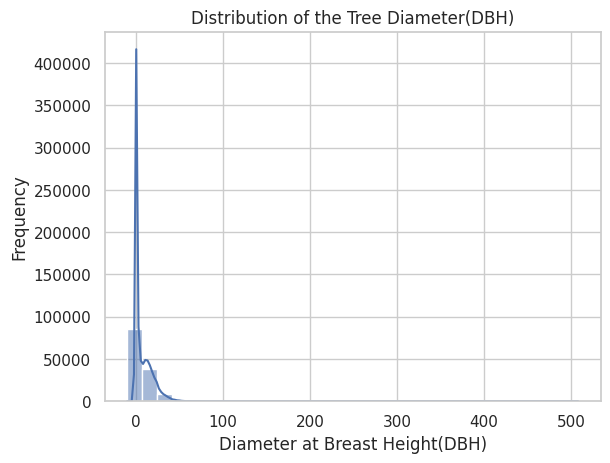

In [ ]:
#EDA-1
# Plot the distribution of DBH (Diameter at Breast Height)
sns.histplot(data_set_cleaned_2['DBH'], bins=30, kde=True)
plt.title('Distribution of the Tree Diameter(DBH)')
plt.xlabel('Diameter at Breast Height(DBH)')
plt.ylabel('Frequency')
plt.show()


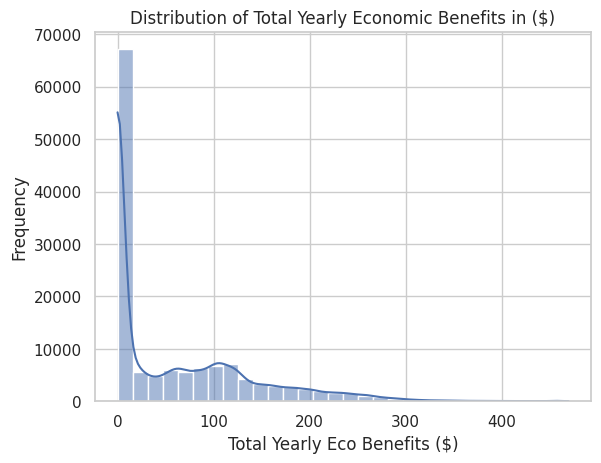

In [ ]:
#EDA-2
# Plot the distribution of Total Yearly Eco Benefits
sns.histplot(data_set_cleaned_2['Total Yearly Eco Benefits ($)'], bins=30, kde=True)
plt.title('Distribution of Total Yearly Economic Benefits in ($)')
plt.xlabel('Total Yearly Eco Benefits ($)')
plt.ylabel('Frequency')
plt.show()


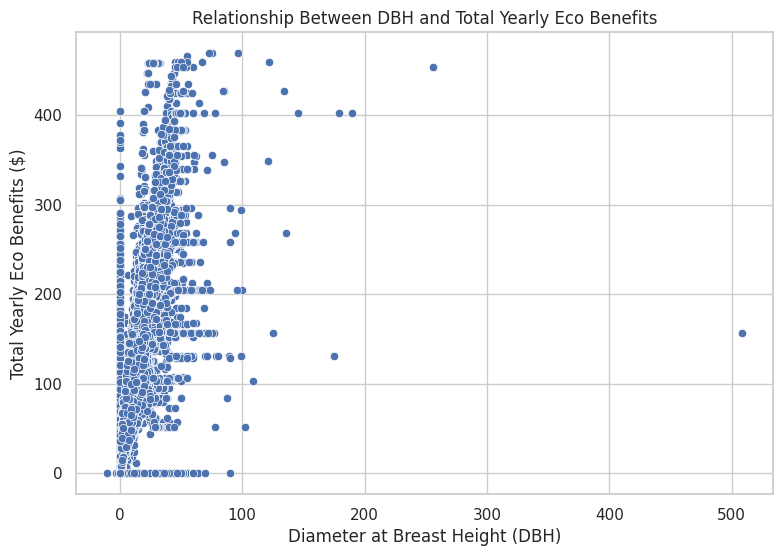

In [ ]:
#EDA-3
# Scatter plot of DBH vs Total Yearly Eco Benefits
plt.figure(figsize=(9,6))
sns.scatterplot(x='DBH', y='Total Yearly Eco Benefits ($)',data=data_set_cleaned_2)
plt.title('Relationship Between DBH and Total Yearly Eco Benefits')
plt.xlabel('Diameter at Breast Height (DBH)')
plt.ylabel('Total Yearly Eco Benefits ($)')
plt.show()


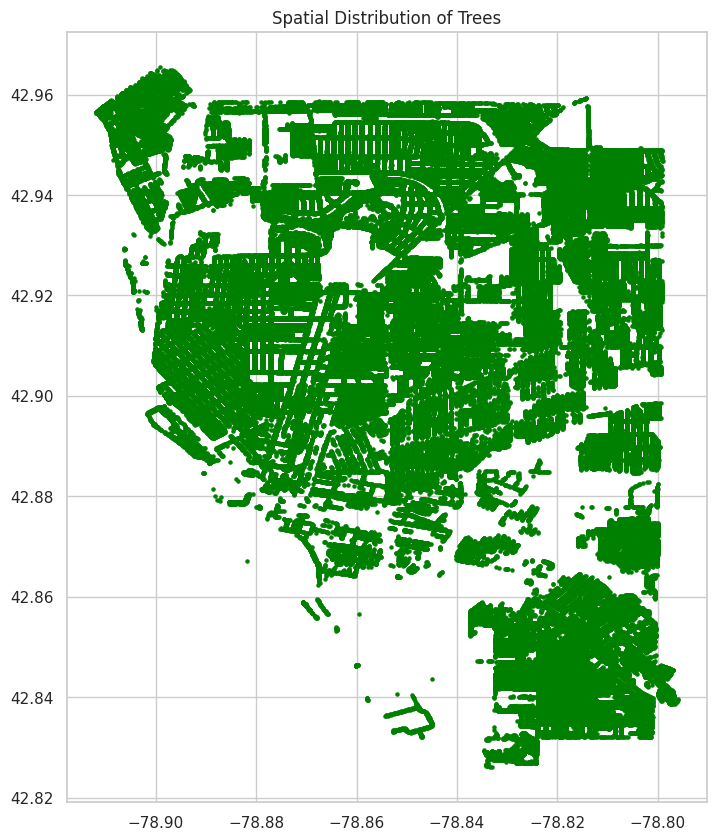

In [ ]:
#EDA-4
# Convert the dataset to a GeoDataFrame for spatial analysis
gdf = gpd.GeoDataFrame(data_set_cleaned_2, geometry=gpd.points_from_xy(data_set_cleaned_2['Longitude'], data_set_cleaned_2['Latitude']))

# Plot tree locations on a map
gdf.plot(figsize=(10,10), color='green', markersize=5)
plt.title('Spatial Distribution of Trees')
plt.show()


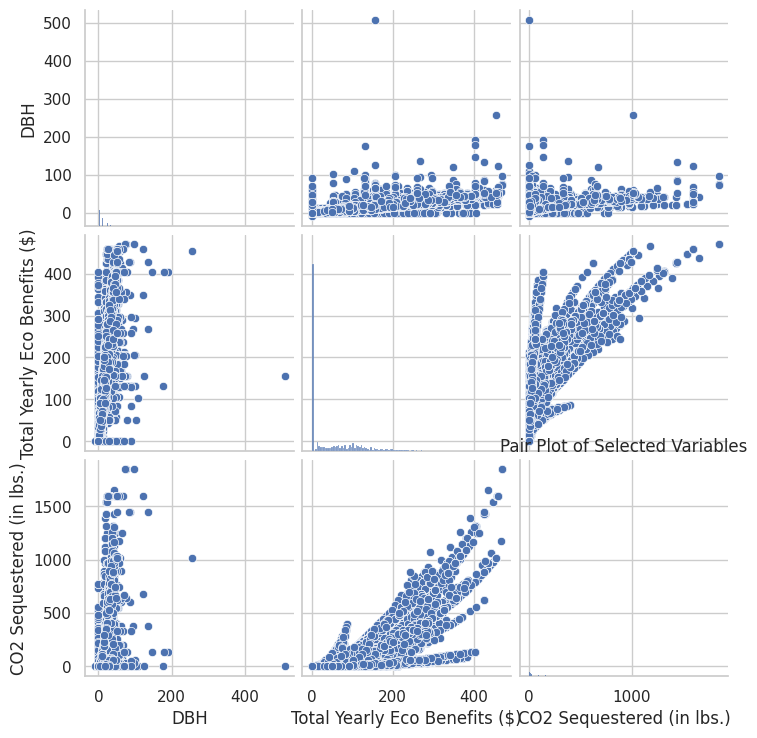

In [ ]:
# Pair plot for DBH, Total Yearly Eco Benefits and CO2 Sequestered
sns.pairplot(data_set_cleaned_2[['DBH','Total Yearly Eco Benefits ($)','CO2 Sequestered (in lbs.)']])
plt.title('Pair Plot of Selected Variables')
plt.show()

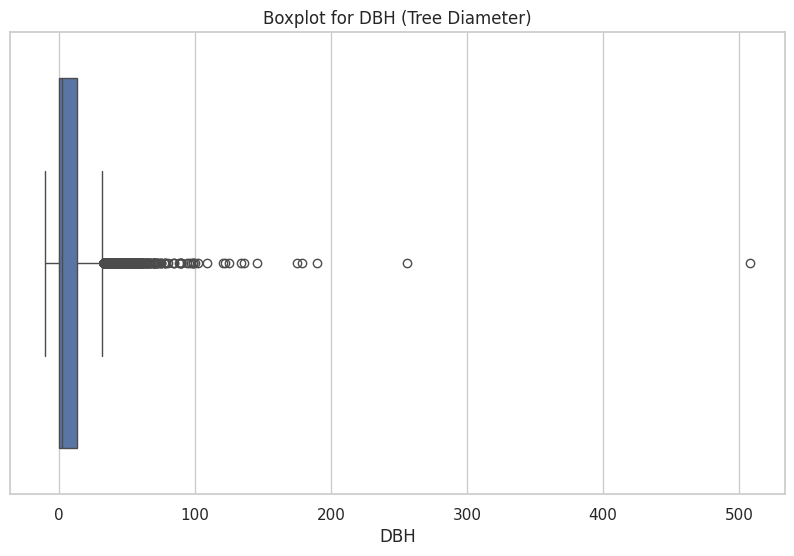

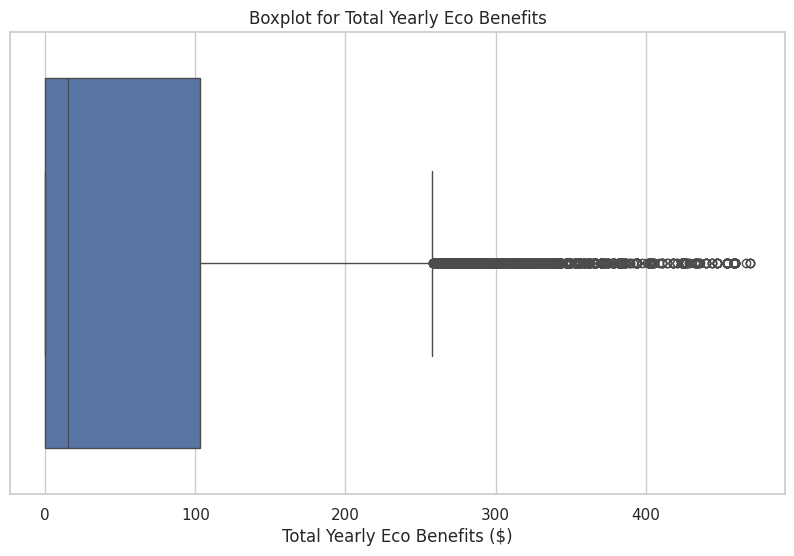

In [ ]:
#EDA-5
# Boxplot for DBH to detect outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=data_set_cleaned_2['DBH'])
plt.title('Boxplot for DBH (Tree Diameter)')
plt.show()

# Boxplot for Total Yearly Eco Benefits to detect outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=data_set_cleaned_2['Total Yearly Eco Benefits ($)'])
plt.title('Boxplot for Total Yearly Eco Benefits')
plt.show()


In [ ]:
#Cleaning-2
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering out the outliers
    df_cleaned = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df_cleaned

# Remove outliers for DBH and Total Yearly Eco Benefits
data_set_cleaned_3 = remove_outliers(data_set_cleaned_2, 'DBH')
data_set_cleaned_4 = remove_outliers(data_set_cleaned_3, 'Total Yearly Eco Benefits ($)')

# Check the new shape of the dataset
data_set_cleaned_4.shape


(127320, 28)

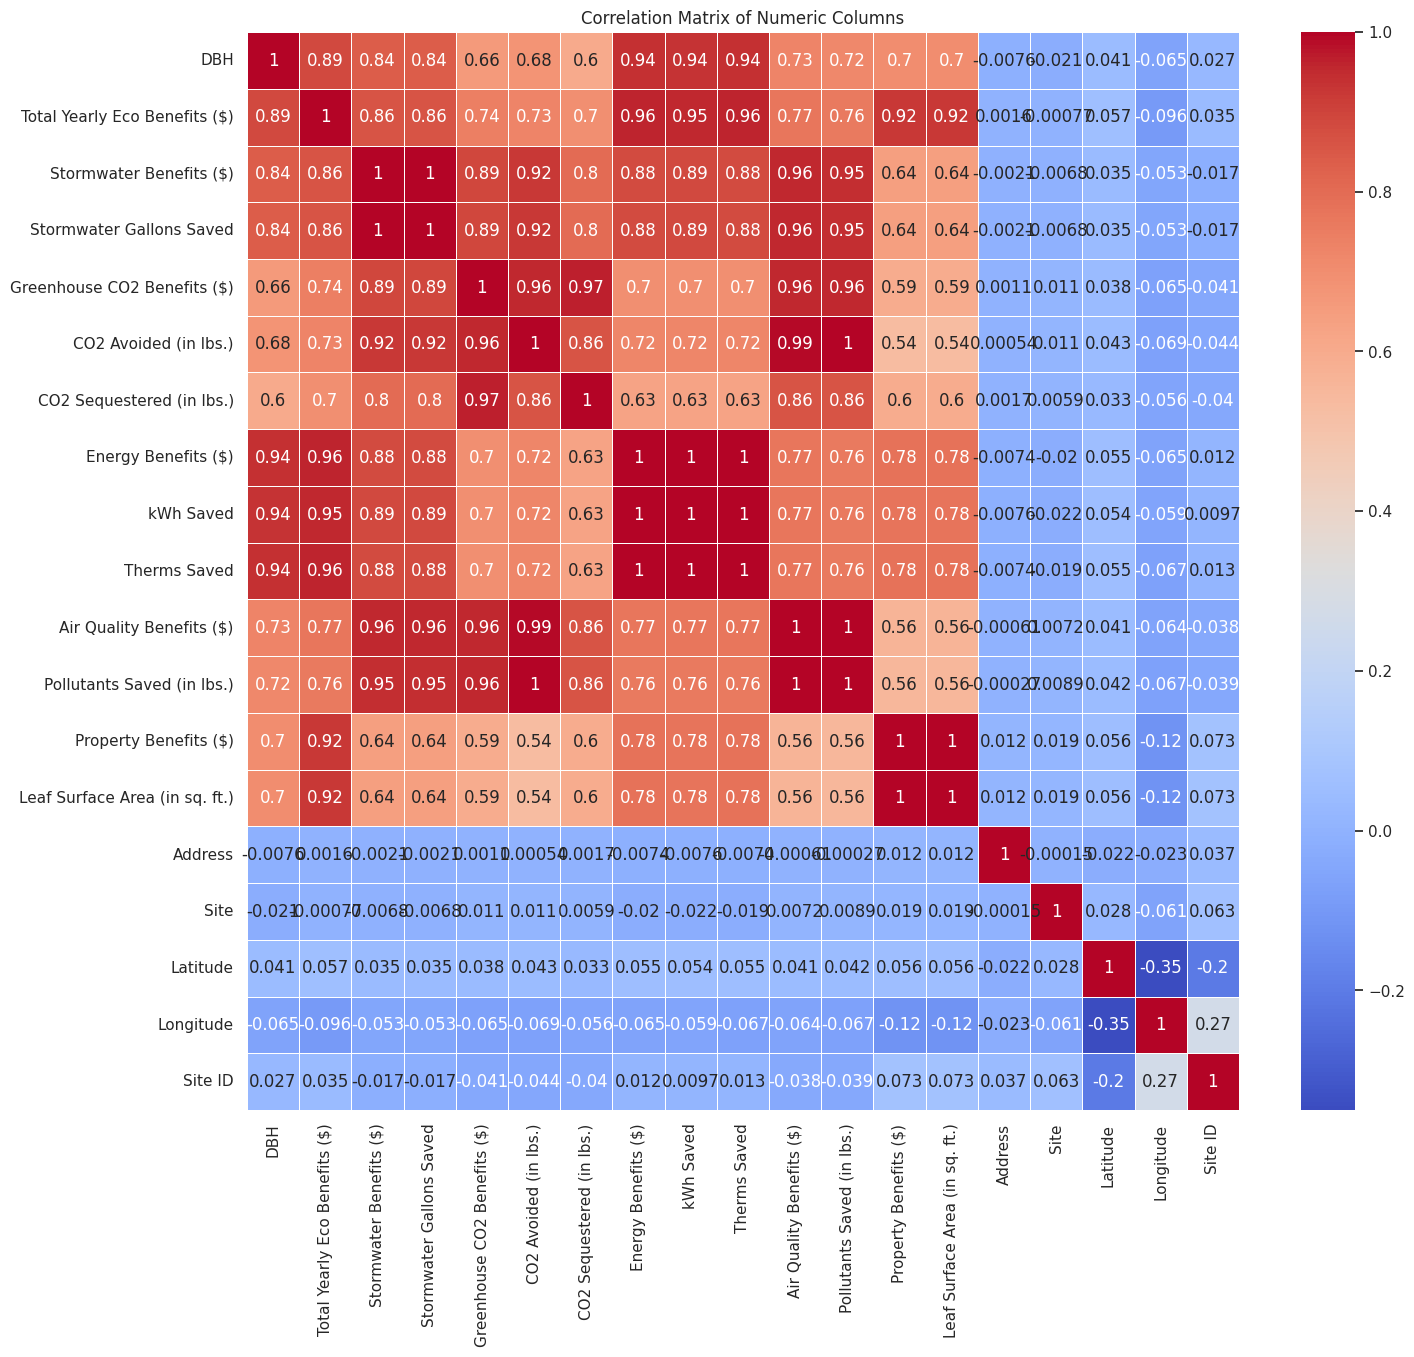

In [ ]:
# Select only numeric columns for correlation analysis
numeric_cols = data_set_cleaned_4.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

#EDA-6
# Plot the heatmap to visualize correlations
plt.figure(figsize=(16,14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


In [ ]:
# Create a new column for Eco Benefits per DBH
data_set_cleaned_4['Eco Benefits per DBH'] = data_set_cleaned_4['Total Yearly Eco Benefits ($)'] / (data_set_cleaned_4['DBH'] + 1)

# Aggregate data by Council District
district_data_aggregated = data_set_cleaned_4.groupby('Council District').agg({
    'DBH': 'mean',
    'Total Yearly Eco Benefits ($)': 'sum',
    'CO2 Sequestered (in lbs.)': 'sum',
    'Stormwater Gallons Saved': 'sum'
}).reset_index()

# Display the first few rows of the aggregated data
district_data_aggregated.head()


<ipython-input-20-0bc5c119dbf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set_cleaned_4['Eco Benefits per DBH'] = data_set_cleaned_4['Total Yearly Eco Benefits ($)'] / (data_set_cleaned_4['DBH'] + 1)


,Council District,DBH,Total Yearly Eco Benefits ($),CO2 Sequestered (in lbs.),Stormwater Gallons Saved
0,Delaware,8.156862,1366431.37,876088.63,9325517.90
1,Ellicott,5.267330,711039.41,557623.27,5346206.31
2,Fillmore,5.617816,642917.15,438223.35,4521609.43
3,Lovejoy,4.947704,445940.03,365226.08,3649641.40
4,Masten,4.697103,577755.93,345153.42,3950248.17


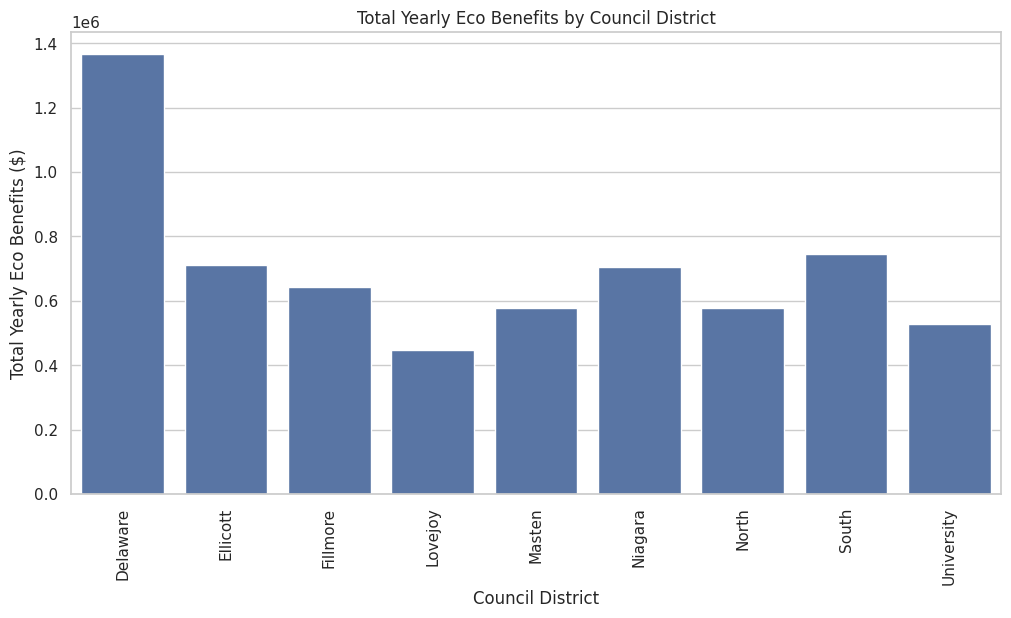

In [ ]:
#EDA-7
# Bar plot for Total Yearly Economic Benefits by Council District
plt.figure(figsize=(12,6))
sns.barplot(x='Council District', y='Total Yearly Eco Benefits ($)', data=district_data_aggregated)
plt.title('Total Yearly Eco Benefits by Council District')
plt.xticks(rotation=90)
plt.show()



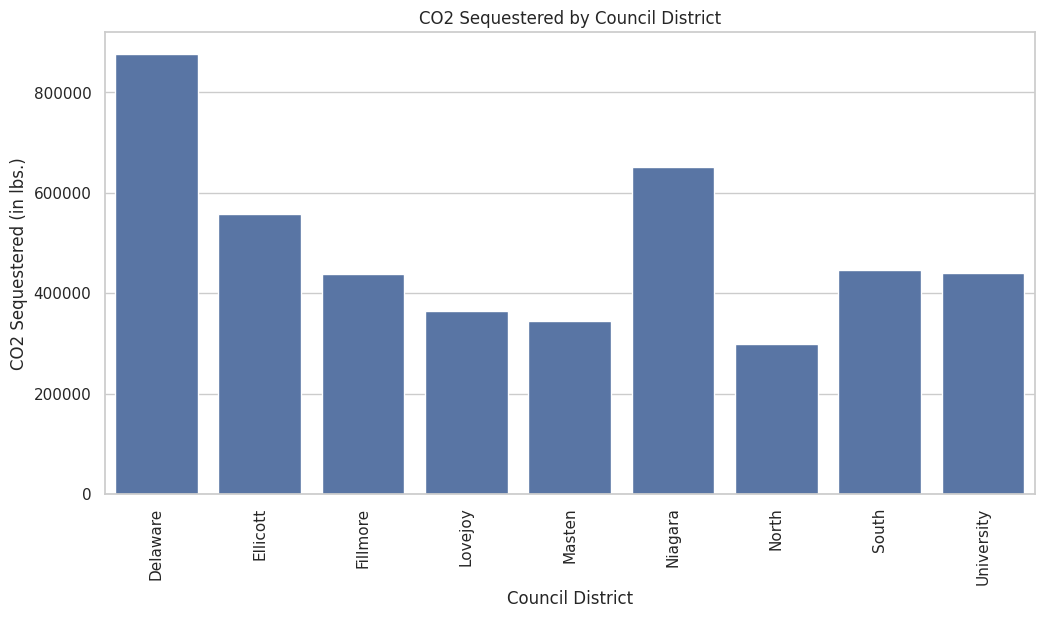

In [ ]:
#EDA-8
# Bar plot for CO2 Sequestered by Council District
plt.figure(figsize=(12,6))
sns.barplot(x='Council District', y='CO2 Sequestered (in lbs.)', data=district_data_aggregated)
plt.title('CO2 Sequestered by Council District')
plt.xticks(rotation=90)
plt.show()


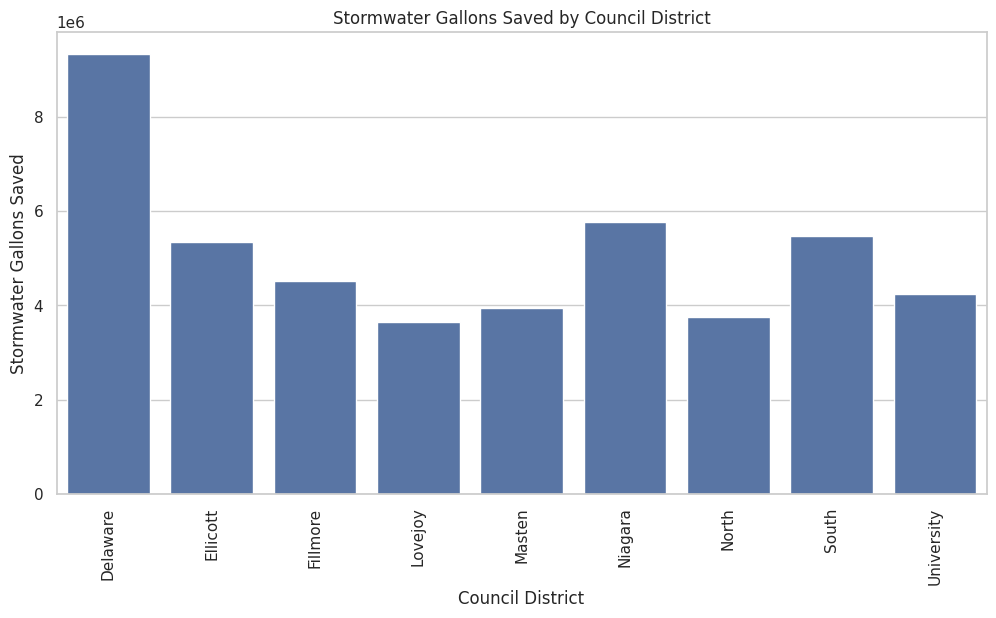

In [ ]:
#EDA-9
# Bar plot for Stormwater Gallons Saved by Council District
plt.figure(figsize=(12,6))
sns.barplot(x='Council District', y='Stormwater Gallons Saved', data=district_data_aggregated)
plt.title('Stormwater Gallons Saved by Council District')
plt.xticks(rotation=90)
plt.show()


Further processing will be done in Phase-2